# **Workflow**

1. We will using Gold Price Data for this project.
2. And we will Pre Processing the data.
3. And Analyst the data.
4. Train Test Split the data using sklearn model selection.
5. And we will using Random Forest Regressor model for this project.
6. Last we will evaluate the project and Predict the Prices.

## **Import the important libraries for this research**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## **Data Collecting and Checking The Data**

In [4]:
# load dataset to a pandas DataaFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
# print first 5 rows of the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
# print the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# print number and columns
gold_data.shape

(2290, 6)

In [14]:
# getting some basic informations od the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
# Checking the number of the missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## **Correlation :**

for the clearly information about correlation i'll drop the link from wikipedia :

https://en.wikipedia.org/wiki/Correlation

In [17]:
correlation = gold_data.corr()

## **Visualize The Data**

Visualize the data with heatmap to understand the correlation from this data.

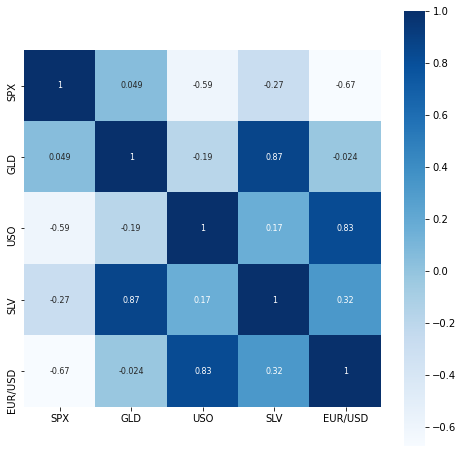

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation, cbar=True, square=True, 
    annot=True, annot_kws={'size': 8}, cmap='Blues')

In [23]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


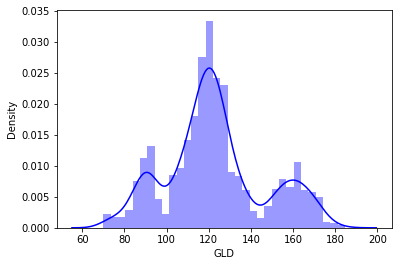

In [25]:
# checking the distribution of the gold prices
sns.distplot(gold_data['GLD'], color='blue')

## **Splitting the Features and The Target**

Split the data to 2 variable X (Features) and y (Target).

In [26]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [28]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## **Split the Data to Training and Test Data**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

Model Training, Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# training the model
regressor.fit(X_train, y_train, sample_weight=None)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## **Model Evaluation**

In [33]:
# predicition on test data
test_data_predicition = regressor.predict(X_test)

In [34]:
print(test_data_predicition)

[113.25780035 147.7379011  140.82389776 112.69370187 113.63479934
  95.45779942 111.62469977  93.44189974 120.85090015 127.3147
 147.89439977 120.51249916 119.24760024  88.07060014  96.01820025
  92.76619855 116.38250062  88.83799897 125.39170115 114.62490014
 119.19589945 153.0937017  122.63319791 120.05779977 171.09999902
 108.16279848 120.739601    87.19459887  87.8336004   88.06599885
 121.72500015 154.42180166 149.8904984  126.57459979 126.43690034
  90.93499893 158.092699   121.34500182 106.76230072 144.11929639
  92.64059963 127.60250124 117.50610126 152.67920115 119.21089936
  91.42340203  77.81100044 120.18360153 132.64910034 119.01799927
 127.32840073 165.93150035 153.56540024  92.56699992 149.31780019
 151.89179867 113.46950138 113.0710004   86.95479873 127.61470004
 125.11210107 151.88490233 114.42319974 110.63619989 160.93449729
 117.26779861 108.44780101 131.90590001 132.90350116 125.4771004
 117.04209978 149.18330208 156.0492999  168.50129528 110.16550085
 140.93929692 1

## **Checking the R-Squared Error**

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [35]:
# R Squared Error
error_scored = metrics.r2_score(y_test, test_data_predicition)
print(f'R-Squared Error : {error_scored}')

R-Squared Error : 0.9923033079300797


## **Compared the Actual Value and the Predicted Value in Plot**

In [38]:
# we need to change the y_test to list before plotting
y_test = list(y_test)

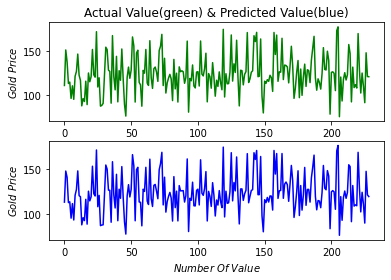

In [53]:
plt.subplot(2, 1, 1)
plt.plot(y_test, color='green', label='Actual Value')
plt.title('Actual Value(green) & Predicted Value(blue)')
plt.ylabel('$Gold$ $Price$')

plt.subplot(2, 1, 2)
plt.plot(test_data_predicition, color='blue', label='Predicted Value')
plt.ylabel('$Gold$ $Price$')
plt.xlabel('$Number$ $Of$ $Value$')
plt.show()

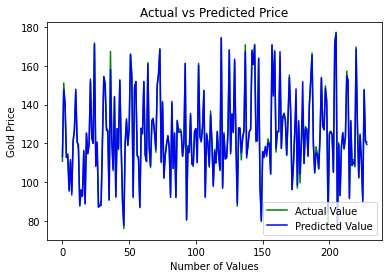

In [54]:
plt.plot(y_test, color='green', label='Actual Value')
plt.plot(test_data_predicition, color='blue', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

## **And Last, Predict The Prices Of Gold**

In [55]:
input_data = () # SPX, USO,  SLV,  EUR/USD

# Changing the data type to numpy array
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = regressor.predict(reshape_array)
print(prediction)

[85.47539953]
